<a href="https://colab.research.google.com/github/gptchat12370-ai/Group-A-DLI-Assignment/blob/main/DT(Rasheed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import** **libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")

# **Dataset 1: CICIDS2017**
The CICIDS2017 dataset is publicly available at: https://www.unb.ca/cic/datasets/ids-2017.html

Due to the large size of this dataset and the file size limit of GitHub, the sampled subset of CICIDS2017 is used. The subsets are in the "Data" folder. PS: The results might be different from the paper due to the size difference of the dataset.

The Canadian Institute for Cybersecurity Intrusion Detection System 2017 (CICIDS2017) dataset has the most updated network threats. The CICIDS2017 dataset is close to real-world network data since it has a large amount of network traffic data, a variety of network features, various types of attacks, and highly imbalanced classes.

# **Load data**

In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [4]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
import lightgbm as lgb
import catboost as cb
import time

In [5]:
# Read the dataset
df = pd.read_csv('/content/CICIDS2017_sample_0.02.csv')

In [6]:
# print the class distribution of the last column
df['Label'].value_counts()

,count
Label,
BENIGN,22731
DoS,19035
PortScan,7946
BruteForce,2767
WebAttack,2180
Bot,1966
Infiltration,36


# **Data pre-processing**

In [7]:
# Encode the dataset
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [8]:
# address empty values
if df.isnull().values.any() or np.isinf(df).values.any(): # if there is any empty or infinite values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace = True)

In [9]:
# Split the dataset into training and testing
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

# **model training**
**Decision Tree (ET)**

Training time:  4.205076694488525
Prediction time:  0.014569640927477588 ms
Cross-Validation scores:  [0.98808736 0.98768946 0.98828513]
Mean of Cross-Validation scores:  0.9880206480164281
Accuracy of ET: 0.9894996911673872
Precision of ET: 0.9895868550132068
Recall of ET: 0.9894996911673872
F1-score of ET: 0.9894399241016295
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4547
           1       0.93      0.97      0.95       393
           2       0.98      1.00      0.99       554
           3       0.99      1.00      1.00      3807
           4       1.00      0.43      0.60         7
           5       1.00      1.00      1.00      1589
           6       0.98      0.96      0.97       436

    accuracy                           0.99     11333
   macro avg       0.98      0.91      0.93     11333
weighted avg       0.99      0.99      0.99     11333



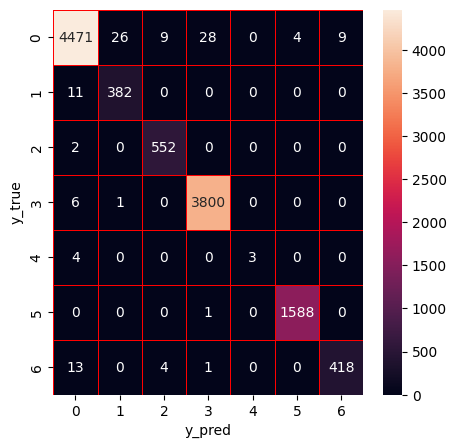

CPU times: user 16.9 s, sys: 175 ms, total: 17.1 s
Wall time: 20.7 s


In [11]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Extra Trees training and prediction with 3-fold cross-validation
et = ExtraTreesClassifier(random_state=0)
et_scores = cross_val_score(et, X_train, y_train, cv=3)

# calculate the training time
start = time.time()
et.fit(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = et.predict(X_test)
end = time.time()
print('Prediction time: ', (end - start) / len(X_test) * 1000, 'ms')


y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', et_scores)
print('Mean of Cross-Validation scores: ', np.mean(et_scores))

# Evaluation metrics
et_score = et.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of ET: ' + str(et_score))
print('Precision of ET: ' + str(precision))
print('Recall of ET: ' + str(recall))
print('F1-score of ET: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [12]:
pd.Series(y_train).value_counts()

,count
0,18184
3,15228
5,6357
2,2213
6,1744
1,1573
4,29


In [16]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.9/185.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.4/198.4 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 7.3 MB/s eta 0:00:00


In [17]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_csv(filepath='/content/CICIDS2017_sample_0.02.csv')

In [18]:
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 0,stratify = df['Label'])
X_train = training_set[fs]
y_train = training_set.iloc[:, -1]
X_test = test_set[fs]
y_test = test_set.iloc[:, -1]

NameError: name 'fs' is not defined